Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/ibm/archive.zip'

Archive:  /content/drive/MyDrive/ibm/archive.zip
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/Dataset/test_set/forest/146019.jpg  
  inflating: Dataset/Dataset/test_set/forest/1506697583544.jpg  
  inflating: Datase

**Image Preprocessing**



In [3]:
# import keras library
import keras
#import ImageDataGenerator from keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator 

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:

train_datagen = ImageDataGenerator(
                                   rotation_range=180,
                                   brightness_range=None,
                                   shear_range=0.4,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255,)

In [6]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
xtrain = train_datagen.flow_from_directory('/content/Dataset/Dataset/train_set',
                                           target_size=(64,64),
                                           class_mode='binary',
                                           batch_size=100)

Found 436 images belonging to 2 classes.


In [8]:
xtest = train_datagen.flow_from_directory('/content/Dataset/Dataset/test_set',
                                           target_size=(64,64),
                                           class_mode='binary',
                                           batch_size=100)

Found 121 images belonging to 2 classes.


**Model Building**

1. Import the Model Builing Libraries

In [9]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

2. Initialize the Model

In [10]:
model = Sequential()

3. Adding CNN Layers

In [11]:
#Convolution Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [12]:
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#Flatten Layer
model.add(Flatten())

4. Adding Dense Layer

In [14]:
#Hidden Layer
model.add(Dense(350,activation='relu')) # Hidden layer 1
model.add(Dense(200,activation='relu')) # Hidden layer 2

In [15]:
#Output Layer
model.add(Dense(1,activation='softmax'))

5. Configuring The Learning Process

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

6. Training the Model

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/10
5/5 [==============================] - 27s 4s/step - loss: 1.1776 - accuracy: 0.3555 - val_loss: 0.5062 - val_accuracy: 0.4050
Epoch 2/10
5/5 [==============================] - 15s 4s/step - loss: 0.6706 - accuracy: 0.3555 - val_loss: 0.3663 - val_accuracy: 0.4050
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.4347 - accuracy: 0.3555 - val_loss: 0.2793 - val_accuracy: 0.4050
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.3615 - accuracy: 0.3555 - val_loss: 0.2003 - val_accuracy: 0.4050
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 0.2997 - accuracy: 0.3555 - val_loss: 0.1575 - val_accuracy: 0.4050
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.2407 - accuracy: 0.3555 - val_loss: 0.1290 - val_accuracy: 0.4050
Epoch 7/10
5/5 [==============================] - 15s 3s/step - loss: 0.2670 - accuracy: 0.3555 - val_loss: 0.1571 - val_accuracy: 0.4050
Epoch 8/10
5/5 [==================

7. Saving the Model

In [18]:
model.save('Forest_fire.h5')

8. Prediction

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
img = image.load_img('/content/Fire-Forest.jpg',target_size=(64,64))

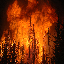

In [23]:
img

In [24]:
x=image.img_to_array(img)
#expand the image shape
x=np.expand_dims(x,axis=0)

In [25]:
pred=model.predict(x)

1/1 [==============================] - 0s 125ms/step


In [26]:
print (pred)

[[1.]]


Video Analysis

OpenCV For Video Processing

1: Capture Video from Camera

In [27]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model


In [29]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 19.0 MB/s 


In [30]:
from twilio.rest import Client

In [31]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=b288d3136966667575bd1739c4951e140fc7b17285c535dc3f7b39dc91af604b
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [32]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from playsound import playsound

3: Loading our saved model file using load_model from Keras library

In [35]:
model = load_model(r'forest1.h5')

In [36]:
video = cv2.VideoCapture(0)

In [37]:
name = ['forest', 'with fire']

openCV intergeration

In [46]:
account_sid = 'ACe316932976f5aff487f6cdcab9a13579'
auth_token= '2388b1f10e88371fd6ebeabc00fd3ebf'
client = Client (account_sid, auth_token)
message = client.messages\
.create(
    body='Forest Fire is detected, stay alert',
    from_= '+12183043886',
    to='+916374835017')
print(message.sid)

SM6e87d843df48e379caa471b1d2fa85a6
